<a href="https://colab.research.google.com/github/Blassaj/Reconocimiento_patrones_sofcomputing_e_IA/blob/main/Clase2_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1**: Análisis del primer dataset.

Inicializamos las bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

Abrimos un dataset y lo visualizamos:

In [2]:
datas = pd.read_csv('/content/ejercicio1_2.csv', header=0, sep=";")
print(datas)
print(datas.shape)

    informeNumero      fecha  ...  sedes_ucma  observaciones
0             131  25/9/2020  ...           4            NaN
1             130  24/9/2020  ...           4            NaN
2             129  23/9/2020  ...           4            NaN
3             128  22/9/2020  ...           4            NaN
4             127  21/9/2020  ...           4            NaN
..            ...        ...  ...         ...            ...
83             10   4/7/2020  ...           3            NaN
84              9   3/7/2020  ...           3            NaN
85              8   2/7/2020  ...           3            NaN
86              7   1/7/2020  ...           3            NaN
87              1  30/6/2020  ...           3            NaN

[88 rows x 19 columns]
(88, 19)


Calculamos algunas variables estadísticas (media, desvío estandar, etc):

In [3]:
print(datas['total_camas_ocupadas_ucma'].describe())


count    88.000000
mean      5.170455
std       4.334363
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      21.000000
Name: total_camas_ocupadas_ucma, dtype: float64


Graficamos el histograma y boxplot de las distintas variables del dataset:

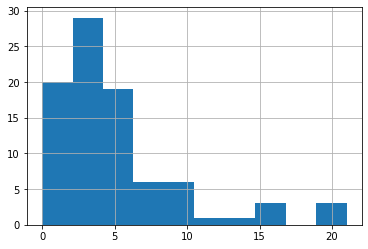

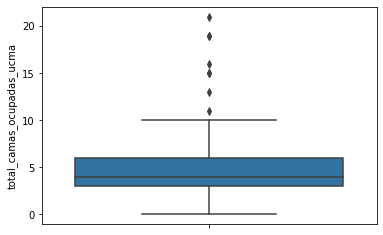

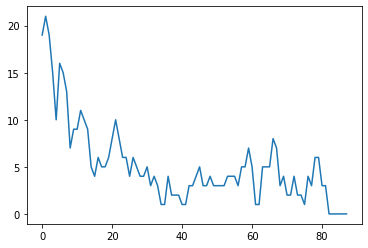

In [4]:
graf1=datas['total_camas_ocupadas_ucma'].hist()
plt.show(graf1)
graf2=sns.boxplot(y=datas['total_camas_ocupadas_ucma'])
plt.show(graf2)
graf3=datas['total_camas_ocupadas_ucma'].plot()
plt.show(graf3)


### Respuestas sobre el primer dataset:


*   Las observaciones del dataset son acumulativas por lo que para facilitar el análisis habría que obtener el conteo diario de las distintas variables/atributos.
*   No se puede determinar directamente si la distribución de las observaciones es normal o Gaussiana debido al caracter acumulativo, y aún obteniendo el conteo diario no cumplen con algunas condiciones básicas como pueden ser:
    *   Ser simétricas respecto a la media.
    *   Tener el máximo en la media.
    *   Crece hasta la media y decrece a partir de ella.


# **Ejercicio 1:** Análisis del segundo dataset.



Hacemos el mismo análisis exploratorio con el segundo dataset, en este caso la toma de datos/observaciones no son acumulativas.

### Repuestas sobre el segundo dataset:


*   En el caso de la variable "total_camas_hospitales" las observaciones se mantienen relativamente constantes en el tiempo, aunque ciertas observaciones figuran en cero. 
*   Las variables "camas_sospechosos_covid" y "respiradores_ocupados" son las que presentan una distribución más parecida a la normal o Gaussiana.
*   A partir de cierta fecha no contamos con datos de las variables "respiradores_covid_totales" y "respiradores_covid_ocupados".




# **Ejercicio 2:**: Generar un dataset con dos conjuntos Gaussianos (con diferente media y desvío estandar). Encontrar el umbral de clasificación por mínimo error usando la curva ROC y evaluar parámetros de calidad del clasificador.


Inicializamos las bibliotecas básicas.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importamos las herramientas de la biblioteca de skilearn para generar nuestra curva ROC.

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Creamos 2 conjuntos de datos que sigan una distribución Gaussiana con 50 muestras cada uno, distinta media y desvío.

[[-0.26623674  1.578341    0.24767631 ... -0.17070155  0.76586746
  -2.1686185 ]
 [ 0.09555698 -1.27596128  1.80296332 ...  2.08668273  1.14709994
  -0.34462367]
 [-0.35182698  0.27494148 -0.74571462 ...  1.64794463 -0.29432324
   1.09170863]
 ...
 [ 0.40029749  2.02639356  0.65403659 ...  0.49918436  0.28925254
  -0.97133221]
 [-1.45445982 -1.49524981  0.10112055 ...  0.60795344  0.3665932
  -0.52274185]
 [ 0.58261383  1.54721615  0.45369511 ...  0.81343367 -0.6826236
  -1.01466268]]


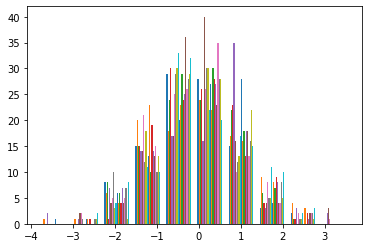

[1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1]


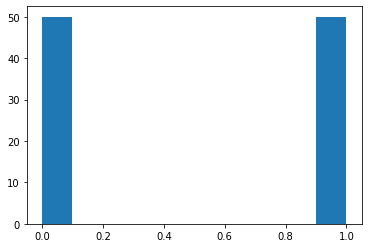

In [7]:
dat1, dat2 = make_classification(n_samples=100, n_classes=2,random_state=2)
print(dat1)
graf1=plt.hist(dat1)
plt.show(graf1)
print(dat2)
graf2=plt.hist(dat2)
plt.show(graf2)

Otra opción:

In [8]:
#med1,des1=(20,5) #media y desvío del primer muestreo
#d1=np.random.normal(med1,des1,50)
#dt1=np.round(d1)
#print(dt1)
#graf1=plt.hist(dt1)
#plt.show(graf1)

#med2,des2=(15,4) #media y desvío del segundo muestreo
#d2=np.random.normal(med2,des2,50)
#dt2=np.round(d2)
#print(dt2)
#graf2=plt.hist(dt2)
#plt.show(graf2)

Generamos nuestros sets de entrenamiento y testeo para usar luego en la clasificación.

In [9]:
train_dat1, test_dat1, train_dat2, test_dat2=train_test_split(dat1, dat2, test_size=0.5, random_state=2)
print(train_dat1)
print(train_dat2)

[[ 7.66744294e-01 -1.62013098e-01 -4.69369039e-01 -3.19745842e-01
   8.74153434e-01  1.14107245e-01  2.67248091e-01  1.12188660e+00
   8.97839682e-01 -5.36743869e-01 -1.29114905e+00 -7.12805664e-01
   2.88741056e-03 -1.23253914e+00  2.04091775e+00 -5.57114597e-01
   2.69542736e+00 -2.99676160e+00  6.72765259e-01 -1.67870974e+00]
 [ 1.96785270e-01  2.64093495e+00  8.84916989e-01  4.24801043e-01
  -3.81664737e+00  2.55541968e-01 -7.58511523e-01  5.60022058e-01
  -1.64129023e-01  1.97749914e-01 -1.88145390e-01  2.83989531e+00
  -5.97657259e-01  3.36836136e-01  2.25961077e-01  9.13505484e-01
  -5.53796527e-01  3.37936610e-01  3.51102376e-02 -7.30028118e-01]
 [-2.00878453e+00 -1.03015177e+00  1.07076857e+00 -5.94722499e-01
  -6.94484899e-01  5.62704887e-01 -5.82070757e-01 -6.29079151e-01
  -9.86496364e-01  1.96262894e-01  1.81208553e+00  7.29494291e-01
  -8.93609209e-01 -8.75896370e-01 -2.05626574e+00 -3.14811843e-01
  -7.40029749e-02  7.51902355e-01 -6.43744900e-01  1.89693224e+00]
 [ 9.40

Generamos una curva de clasificación aleatoria.

In [10]:
prob_aleat = [0 for _ in range(len(test_dat2))]

Aplicamos un método de clasificación a nuestro dataset.

In [11]:
model=LogisticRegression(solver='lbfgs')
model.fit(train_dat1,train_dat2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predecimos las probabilidades de las dos clases.

In [12]:
logreg_probs = model.predict_proba(test_dat1)
print(logreg_probs)

[[0.51310262 0.48689738]
 [0.10107624 0.89892376]
 [0.37452795 0.62547205]
 [0.01272102 0.98727898]
 [0.14990967 0.85009033]
 [0.95897349 0.04102651]
 [0.09517365 0.90482635]
 [0.84039634 0.15960366]
 [0.80805064 0.19194936]
 [0.33780747 0.66219253]
 [0.03178612 0.96821388]
 [0.98207622 0.01792378]
 [0.9806521  0.0193479 ]
 [0.32947899 0.67052101]
 [0.01109058 0.98890942]
 [0.09818455 0.90181545]
 [0.85219228 0.14780772]
 [0.86945468 0.13054532]
 [0.27575279 0.72424721]
 [0.11584558 0.88415442]
 [0.57219637 0.42780363]
 [0.24008503 0.75991497]
 [0.09131585 0.90868415]
 [0.9800619  0.0199381 ]
 [0.66233447 0.33766553]
 [0.96298149 0.03701851]
 [0.01275854 0.98724146]
 [0.99327383 0.00672617]
 [0.88583848 0.11416152]
 [0.6455427  0.3544573 ]
 [0.06174277 0.93825723]
 [0.87829249 0.12170751]
 [0.2949727  0.7050273 ]
 [0.01213383 0.98786617]
 [0.97004586 0.02995414]
 [0.02932564 0.97067436]
 [0.28436053 0.71563947]
 [0.98984411 0.01015589]
 [0.9980766  0.0019234 ]
 [0.05854066 0.94145934]


Del total predicho nos quedamos unicamente con los resultados positivos.

In [13]:
logreg_probs = logreg_probs[:,1]
print(logreg_probs)

[0.48689738 0.89892376 0.62547205 0.98727898 0.85009033 0.04102651
 0.90482635 0.15960366 0.19194936 0.66219253 0.96821388 0.01792378
 0.0193479  0.67052101 0.98890942 0.90181545 0.14780772 0.13054532
 0.72424721 0.88415442 0.42780363 0.75991497 0.90868415 0.0199381
 0.33766553 0.03701851 0.98724146 0.00672617 0.11416152 0.3544573
 0.93825723 0.12170751 0.7050273  0.98786617 0.02995414 0.97067436
 0.71563947 0.01015589 0.0019234  0.94145934 0.28019525 0.14755291
 0.64140937 0.89735211 0.99135074 0.10992594 0.066474   0.50484273
 0.04345392 0.19847886]


Calculamos los resultados del AUC (área bajo la curva) para la regresión logística y la clasificación aleatoria:

In [14]:
aleat_auc = roc_auc_score(test_dat2, prob_aleat)
logreg_auc = roc_auc_score(test_dat2,logreg_probs)
print('Aleatoria: ROC AUC=',(aleat_auc))
print('Logística: ROC AUC=',(logreg_auc))

Aleatoria: ROC AUC= 0.5
Logística: ROC AUC= 0.8808373590982287


Calculamos la curva ROC:

In [15]:
aleat_fpr, aleat_tpr, _ = roc_curve(test_dat2, prob_aleat)
logreg_fpr, logreg_tpr, _ = roc_curve(test_dat2, logreg_probs)

Graficamos la curva ROC para este ejemplo.

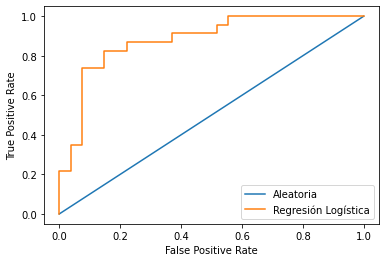

In [16]:
plt.plot(aleat_fpr, aleat_tpr, label="Aleatoria")
plt.plot(logreg_fpr, logreg_tpr, label="Regresión Logística")
plt.xlabel("False Positive Rate") #Agregamos el nombre al eje X
plt.ylabel("True Positive Rate")  #Agregamos el nombre al eje Y
plt.legend()  #Agregamos las referencias
plt.show()  #Mostramos el gráfico completo